<a href="https://colab.research.google.com/github/riyyapandey/DS-Intern-Assignment-Riya-Pandey/blob/main/Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install xgboost --quiet

In [ ]:
import xgboost as xgb

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb

import warnings
warnings.filterwarnings('ignore')


In [ ]:
file_path = '/content/data.csv'
df = pd.read_csv(file_path, parse_dates=['timestamp'])

print("Data Loaded Successfully")
print(df.shape)
df.head()


Data Loaded Successfully
(16857, 29)


,timestamp,equipment_energy_consumption,lighting_energy,zone1_temperature,zone1_humidity,zone2_temperature,zone2_humidity,zone3_temperature,zone3_humidity,zone4_temperature,...,zone9_temperature,zone9_humidity,outdoor_temperature,atmospheric_pressure,outdoor_humidity,wind_speed,visibility_index,dew_point,random_variable1,random_variable2
0,2016-01-11 17:00:00,60,-77.78778597,33.74660934,47.59666667,19.2,44.790000,19.79,NaN,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.300000,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.69333333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.200000,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.3,19.2,44.626667,19.79,44.933333,35.921144,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.100000,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,33.74660934,46.06666667,19.2,44.590000,19.79,45.000000,NaN,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,37.673716,45.410390,45.410390
4,2016-01-11 17:40:00,60,40,19.89,46.33333333,19.2,44.530000,19.79,45.000000,18.890000,...,4.476511,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.900000,10.084097,10.084097


In [ ]:
print("Missing Values:\n", df.isnull().sum())
print("\nData Types:\n", df.dtypes)


Missing Values:
 timestamp                         0
equipment_energy_consumption    844
lighting_energy                 809
zone1_temperature               867
zone1_humidity                  801
zone2_temperature               853
zone2_humidity                  867
zone3_temperature               802
zone3_humidity                  878
zone4_temperature               816
zone4_humidity                  781
zone5_temperature               838
zone5_humidity                  801
zone6_temperature               848
zone6_humidity                  847
zone7_temperature               794
zone7_humidity                  805
zone8_temperature               848
zone8_humidity                  777
zone9_temperature               773
zone9_humidity                  888
outdoor_temperature             806
atmospheric_pressure            842
outdoor_humidity                799
wind_speed                      828
visibility_index                815
dew_point                       826
random_vari

In [ ]:
print(df[['random_variable1', 'random_variable2', 'equipment_energy_consumption']].dtypes)


random_variable1                float64
random_variable2                float64
equipment_energy_consumption     object
dtype: object


In [ ]:
bad_rows = df[~df['random_variable1'].apply(lambda x: str(x).replace('.', '', 1).isdigit()) |
              ~df['random_variable2'].apply(lambda x: str(x).replace('.', '', 1).isdigit()) |
              ~df['equipment_energy_consumption'].apply(lambda x: str(x).replace('.', '', 1).isdigit())]

print("Problematic Rows:\n", bad_rows)


Problematic Rows:
       equipment_energy_consumption lighting_energy zone1_temperature  \
5                               50              40             19.89   
8                              NaN              40             19.79   
11                             580              60       20.06666667   
13                             250              40             20.26   
22                             110              40       21.03333333   
...                            ...             ...               ...   
16829                           40               0                24   
16832                           60               0                24   
16846                          NaN              10             21.29   
16849                          130               0       22.92666667   
16856                           30               0       20.06666667   

      zone1_humidity zone2_temperature  zone2_humidity  zone3_temperature  \
5        46.02666667              19.2 

In [ ]:
df = df[df['random_variable1'].apply(lambda x: str(x).replace('.', '', 1).isdigit()) &
        df['random_variable2'].apply(lambda x: str(x).replace('.', '', 1).isdigit()) &
        df['equipment_energy_consumption'].apply(lambda x: str(x).replace('.', '', 1).isdigit())]


In [ ]:
df['random_variable1'] = pd.to_numeric(df['random_variable1'])
df['random_variable2'] = pd.to_numeric(df['random_variable2'])
df['equipment_energy_consumption'] = pd.to_numeric(df['equipment_energy_consumption'])


In [ ]:
print(df[['random_variable1', 'random_variable2', 'equipment_energy_consumption']].corr())


                              random_variable1  random_variable2  \
random_variable1                      1.000000          0.469611   
random_variable2                      0.469611          1.000000   
equipment_energy_consumption         -0.013297         -0.016718   

                              equipment_energy_consumption  
random_variable1                                 -0.013297  
random_variable2                                 -0.016718  
equipment_energy_consumption                      1.000000  


In [ ]:
for col in X.columns:
    if X[col].dtype == 'object':
        print(f"🔍 Checking column: {col}")
        print(X[col].value_counts())


🔍 Checking column: lighting_energy
lighting_energy
0               9708
10              1541
20              1099
30               401
-77.78778597     148
86.00296633      140
40                57
-10               21
???               19
error             11
-20               11
check              8
unknown            8
50                 6
-30                5
-86.00296633       3
-40                2
70                 1
Name: count, dtype: int64
🔍 Checking column: zone1_temperature
zone1_temperature
21         396
21.39      371
21.5       367
21.2       362
21.29      349
          ... 
23.3         1
23.315       1
22.7225      1
23.2225      1
23.84        1
Name: count, Length: 408, dtype: int64
🔍 Checking column: zone1_humidity
zone1_humidity
76.292756      133
3.348059698    132
37.2           109
39.09          104
37.7           102
              ... 
52.66            1
53.89333333      1
55.89333333      1
48               1
46.69333333      1
Name: count, Length: 1992, d

In [ ]:
X.replace('???', np.nan, inplace=True)


In [ ]:
X.dropna(inplace=True)
y = y[X.index]




In [ ]:
X = X.apply(pd.to_numeric, errors='coerce')

X.dropna(inplace=True)

y = y[X.index]

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)


In [ ]:
def evaluate_model(y_true, y_pred, name):
    print(f"📊 {name}")
    print("R² Score :", r2_score(y_true, y_pred))
    print("MAE      :", mean_absolute_error(y_true, y_pred))
    print("RMSE     :", np.sqrt(mean_squared_error(y_true, y_pred)))
    print("-" * 30)


lr = LinearRegression()
lr.fit(X_train, y_train)
evaluate_model(y_test, lr.predict(X_test), "Linear Regression")


rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
evaluate_model(y_test, rf.predict(X_test), "Random Forest")

xg = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1)
xg.fit(X_train, y_train)
evaluate_model(y_test, xg.predict(X_test), "XGBoost")


📊 Linear Regression
R² Score : 0.018375820875571547
MAE      : 74.22527773327701
RMSE     : 159.5622658123519
------------------------------
📊 Random Forest
R² Score : 0.12862543156408945
MAE      : 67.69998035852565
RMSE     : 150.33496867164342
------------------------------
📊 XGBoost
R² Score : 0.11812164157911154
MAE      : 66.49888483222531
RMSE     : 151.23834408257605
------------------------------


<Figure size 1200x600 with 0 Axes>

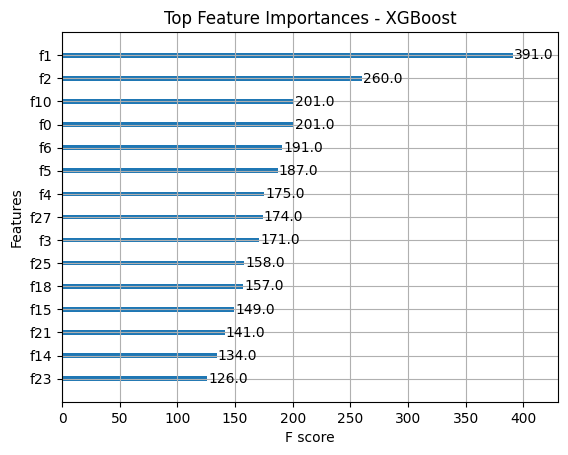

In [ ]:
plt.figure(figsize=(12, 6))
xgb.plot_importance(xg, max_num_features=15)
plt.title("Top Feature Importances - XGBoost")
plt.show()
